<a href="https://colab.research.google.com/github/M0n1ka-05/Cardiovascular_Risk_Prediction_Model/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cardiovascular Risk Prediction**

**Problem Description:**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.


**Data Description:**



**Independent Features:**

• Sex: male or female("M" or "F") 

• Age: Age of the patient 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day 

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous) 

• Glucose: glucose level (Continuous) 

**Target Variable:**

• TenYearCHD (binary: “1”, means “Yes”, “0” means “No”)


In [19]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file1 = ('/content/drive/MyDrive/AlmaBetter/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [5]:
df= pd.read_csv(file1)

In [9]:
#Dividing dataset into training and testing set:
X_train, X_test = train_test_split(df, test_size=0.20, random_state=1)

In [10]:
train_df=pd.DataFrame(X_train, columns=['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']) 

In [13]:
test_df=pd.DataFrame(X_test, columns=['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']) 

In [21]:
train_df.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
303,303,63,1.0,F,NO,0.0,0.0,0,0,0,222.0,146.0,78.0,16.92,65.0,74.0,1
1435,1435,61,2.0,F,NO,0.0,0.0,0,1,0,194.0,148.0,89.0,23.48,100.0,101.0,0
675,675,49,2.0,M,YES,50.0,0.0,0,0,0,252.0,156.0,91.0,25.35,70.0,114.0,1


In [12]:
train_df.shape

(2712, 17)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 303 to 1061
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2712 non-null   int64  
 1   age              2712 non-null   int64  
 2   education        2645 non-null   float64
 3   sex              2712 non-null   object 
 4   is_smoking       2712 non-null   object 
 5   cigsPerDay       2695 non-null   float64
 6   BPMeds           2678 non-null   float64
 7   prevalentStroke  2712 non-null   int64  
 8   prevalentHyp     2712 non-null   int64  
 9   diabetes         2712 non-null   int64  
 10  totChol          2684 non-null   float64
 11  sysBP            2712 non-null   float64
 12  diaBP            2712 non-null   float64
 13  BMI              2701 non-null   float64
 14  heartRate        2711 non-null   float64
 15  glucose          2485 non-null   float64
 16  TenYearCHD       2712 non-null   int64  
dtypes: float64(9

In [22]:
#to get count of null values in train_df
train_df.isna().sum()

id                   0
age                  0
education           67
sex                  0
is_smoking           0
cigsPerDay          17
BPMeds              34
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             28
sysBP                0
diaBP                0
BMI                 11
heartRate            1
glucose            227
TenYearCHD           0
dtype: int64

After split, we made two different dataframe, one is test and other is training. We will keep our testing set untouched and will perform our EDA on training set.

### **Exploratory Data Analysis**

In our dataset we have both categorical as well as numerical features. We will analyse each feature and try to understand the relation between independent and dependent feature.

Also we will discuss importance of each feature.

Id column is just unique value of each record so it is of no use in our model. We will drop Id column on later stage.

**Independent Variable**

**Education**

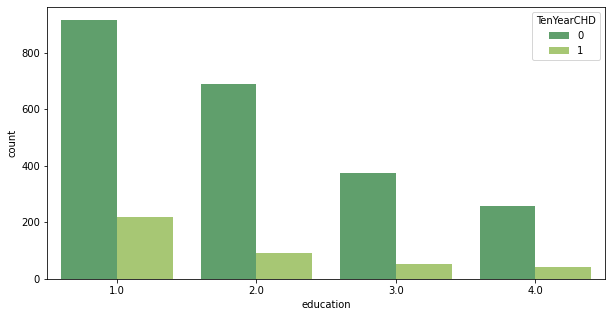

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='TenYearCHD',data=train_df, palette='summer')


**Sex**

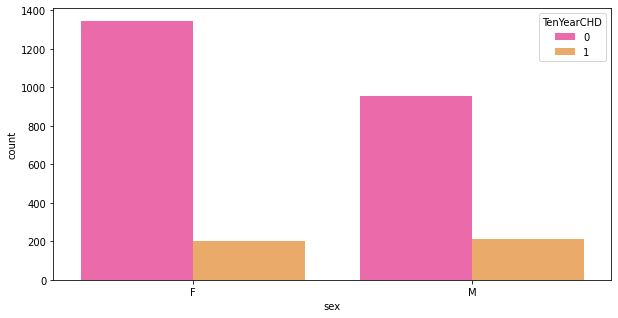

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex',hue='TenYearCHD',data=train_df, palette='spring')

In [26]:
train_df.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
303,303,63,1.0,F,NO,0.0,0.0,0,0,0,222.0,146.0,78.0,16.92,65.0,74.0,1
1435,1435,61,2.0,F,NO,0.0,0.0,0,1,0,194.0,148.0,89.0,23.48,100.0,101.0,0
675,675,49,2.0,M,YES,50.0,0.0,0,0,0,252.0,156.0,91.0,25.35,70.0,114.0,1


**is_smoking**

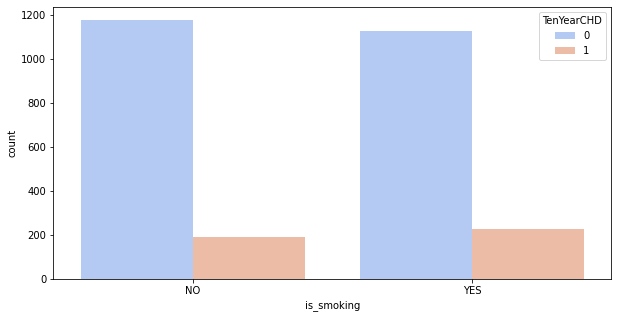

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='is_smoking',hue='TenYearCHD',data=train_df, palette='coolwarm')

In [46]:
train_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [47]:
train_df['cigsPerDay'].value_counts()

0.0     1364
20.0     486
30.0     137
15.0     136
5.0       86
9.0       85
10.0      82
3.0       69
40.0      51
1.0       39
25.0      33
43.0      30
2.0       13
35.0      12
6.0       10
7.0        8
60.0       7
4.0        6
8.0        6
18.0       5
17.0       5
50.0       5
23.0       4
11.0       4
12.0       3
45.0       2
13.0       2
70.0       1
19.0       1
16.0       1
14.0       1
38.0       1
Name: cigsPerDay, dtype: int64